# Практические задания главы 14 «ПРОЕКТ 3: Конвертер валют с графическим интерфейсом»

## Задание 1

1. Создать конвертер валют.
2. Добавьте в созданном приложении еще одну кнопку, которая очищает поля ввода и вывода.
3. Реализовать поля выбора валюты в виде выпадающих списков, используя только те валюты, которые получены по API.

**Решение**

In [43]:
import os
import requests
import tkinter as tk
import tkinter.ttk as ttk
import tkinter.messagebox as msgbox


# Нужно предварительно установить переменную среды API_KEY.
# Для этого в консоли вызвать `jupyter kernelspec list` и по указанному пути
# изменить файл `kernel.json`, добавив туда ключ:
# "env": { "API_KEY": "<ключ ваторизации для API fixer.io>"}
# Перезапустить jupyter notebook.


def get_latest_currency_rates():
    url = "https://api.apilayer.com/fixer/latest"
    headers = {"apikey": os.environ.get("API_KEY", "")}
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        resp = response.json()
        
        if resp.get("success", False):
            return resp.get("rates", {})
        
    return {}


def currency_converter(amount: float, rates: dict, from_currency: str, to_currency: str) -> float:
    from_currency = from_currency.upper()
    to_currency = to_currency.upper()
    
    if from_currency not in rates:
        raise KeyError(f"Недопустимая валюта {from_currency}")
    if to_currency not in rates:
        raise KeyError(f"Недопустимая валюта {to_currency}")
    
    if from_currency != "EUR":
        amount /= rates[from_currency]

    return round(amount * rates[to_currency], 2)


def gui():
    # получение валют
    rates = get_latest_currency_rates()
    
    # создание окна
    window = tk.Tk()
    window.title("Конвертер валют")
    
    # виджеты Label
    input_label = tk.Label(window, text="Сумма для конвертации:",
                           font="arial 12 bold", borderwidth=10)
    from_currency_label = tk.Label(window, text="Из валюты:",
                                   font="arial 12", borderwidth=10)
    to_currency_label = tk.Label(window, text="В валюту:",
                                 font="arial 12", borderwidth=10)
    output_label = tk.Label(window, text="Итог:",
                            font="arial 12 bold", borderwidth=10)
    
    # виджеты Entry
    input_amount_text = tk.StringVar()
    input_amount_text.set(1)
    input_amount = tk.Entry(window, font="arial 12 bold", borderwidth=5,
                            textvariable=input_amount_text)
    
    output_amount_text = tk.StringVar()
    output_amount = tk.Entry(window, font="arial 12 bold", borderwidth=5,
                             state="readonly",
                             textvariable=output_amount_text)
    
    # виджеты Combobox
    values = list(rates.keys())
    from_currency = ttk.Combobox(window, font="arial 12 bold", 
                                 state="readonly",
                                 values=values)
    from_currency.current(values.index("EUR"))
    
    to_currency = ttk.Combobox(window, font="arial 12 bold", 
                               state="readonly",
                               values=values)
    to_currency.current(values.index("RUB"))
    
    # действие по кнопке конвертации
    def convert_button_command():
        err_title = "Ошибка"
        
        amount = input_amount.get()
        if not amount:
            msgbox.showerror(err_title, "Не введена сумма для конвертации")
            return
        
        from_currency_val = from_currency.get()
        if not from_currency_val:
            msgbox.showerror(err_title, "Не введена валюта, из которой конвертировать")
            return
        
        to_currency_val = to_currency.get()
        if not to_currency_val:
            msgbox.showerror(err_title, "Не введена валюта, в которую конвертировать")
            return
        
        # пытаемся преобразовать во float
        try:
            amount = float(amount)
        except (ValueError, TypeError):
            msgbox.showerror(err_title, f"Введено недопустимое значение суммы ({amount!r})")
            return
        
        # пытаемся выполнить конвертацию по курсу валют
        try:
            converted = currency_converter(amount, rates, from_currency_val, to_currency_val)
        except KeyError as ex:
            msgbox.showerror(err_title, f"{ex}")
            return
            
        output_amount_text.set(converted)
    # кнопка конвертации
    convert_button = tk.Button(window, text="Конвертировать",
                               font="arial 16 bold", borderwidth=10,
                               padx=50, bg="powder blue",
                               command=convert_button_command)
    
    # действие по кнопке удаления
    def clear_button_command():
        input_amount_text.set(1)
        output_amount_text.set("")
    clear_button = tk.Button(window, text="Очистить поля",
                             font="arial 16 bold", borderwidth=10,
                             padx=50, bg="powder blue",
                             command=clear_button_command)
    
    
    # размежение виджетов в окне
    input_label.grid(row=0, column=0)
    from_currency_label.grid(row=1, column=0)
    to_currency_label.grid(row=2, column=0)
    
    input_amount.grid(row=0, column=1)
    from_currency.grid(row=1, column=1)
    to_currency.grid(row=2, column=1)
    
    convert_button.grid(row=3, columnspan=2)
    clear_button.grid(row=4, columnspan=2)
    
    output_label.grid(row=5, column=0)
    output_amount.grid(row=5, column=1)
    
    return window


def main():
    app = gui()
    app.mainloop()
    
    
main()

## Результат

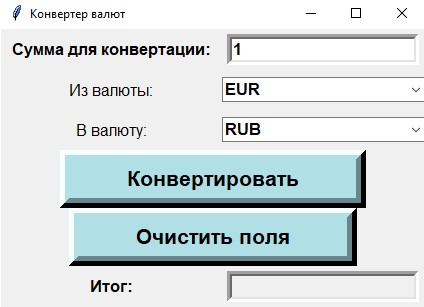

In [45]:
from PIL import Image

Image.open("images/tkinter-converter.jpg")